In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import Image
from IPython.core.display import HTML 

from matplotlib import cm
import re

import cufflinks as cf
import chart_studio.plotly as py
import plotly as py
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff

cf.set_config_file(sharing ="public", theme ="ggplot", offline = True)

In [2]:
GSAF = r"C:\Users\lenovo\Desktop\Ironhack\Second project - IMDB-FA\Src\clean_data_filmaff_imdb.csv"

df = pd.read_csv(GSAF, encoding = "ISO-8859-1")

### Hypotesis

1. Filmaffinity users gives lower scores overall, and tends to dislike Romance more than IMDB users.
2. IMDB users likes shorter movies.

## 1. Filmaffinity mean < IMDB mean.

In [3]:
df.columns

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Director', 'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross',
       'Spanish name', 'Filmaffinity link', 'Filmaffinity score',
       'Filmaffinity votes'],
      dtype='object')

In [4]:
df_scores = df[["Series_Title", "IMDB_Rating", "Filmaffinity score"]]

In [5]:
df_scores_plot = pd.DataFrame()
total = df_scores["Filmaffinity score"].sum()
number_entries = len(df_scores["Filmaffinity score"])
mean = total/number_entries

df_scores_plot["Filmaffinity score mean"] = [mean]

In [6]:
total = df_scores["IMDB_Rating"].sum()
number_entries = len(df_scores["IMDB_Rating"])
mean = total/number_entries

df_scores_plot["IMDB score mean"] = [mean]

In [7]:
df_scores_plot
y = ["Filmaffinity score mean","IMDB score mean"]

<AxesSubplot:title={'center':'Mean score by Page'}>

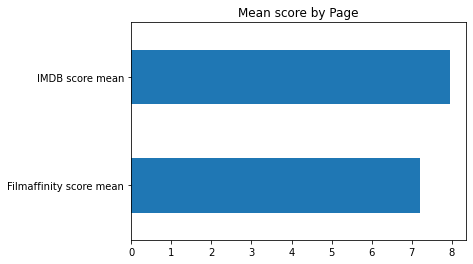

In [8]:
df_scores_plot.mean().plot(kind='barh', title ="Mean score by Page")

In [9]:
fig_scores = px.bar(df_scores_plot, y=["Filmaffinity score mean","IMDB score mean"], title="Mean score by Page", barmode="group", text_auto=True)
fig_scores.update_layout(barmode='group', bargap=0.5,bargroupgap=0.3)
fig_scores

## 2. Imdb users like shorter movies more than longer movies

In [14]:
mean_runtime = df["Runtime"].mean()
mean_runtime

123.56

In [15]:
greater_than_mean = df[df["Runtime"] > mean_runtime]

lesser_than_mean = df[df["Runtime"] < mean_runtime]

In [44]:
df_greater_than_mean = pd.DataFrame()
total = greater_than_mean["IMDB_Rating"].sum()
number_entries = len(greater_than_mean["IMDB_Rating"])
mean = total/number_entries

df_greater_than_mean["Length higher than mean (123,56)"] = [mean]

In [45]:
total = lesser_than_mean["IMDB_Rating"].sum()
number_entries = len(lesser_than_mean["IMDB_Rating"])
mean = total/number_entries

df_greater_than_mean["Length lesser than mean (123,56)"] = [mean]

<AxesSubplot:title={'center':'Mean score by film length'}, xlabel='Score'>

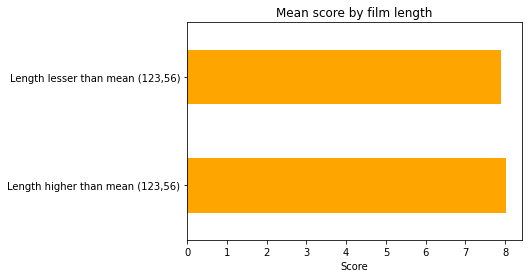

In [56]:
ax = df_greater_than_mean.mean().plot(kind='barh', title ="Mean score by film length", color = "Orange")
ax.set_xlabel("Score")
ax

In [48]:
fig_imd_mean = px.bar(df_greater_than_mean , y=["Length higher than mean (123,56)","Length lesser than mean (123,56)"], title="Mean score by film length", barmode="group", text_auto=True)
fig_imd_mean.update_layout(barmode='group', bargap=0.5,bargroupgap=0.3)
fig_imd_mean